In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.close()

In [2]:
#vol 및 변수들 지정
x_vol = 0.079 ; y_vol = 0.105
r = 0.021
N = 100; T = 1

In [3]:
# dt, rho 등 변수와 corr matrix만들기
S1 = np.zeros((N+1, 1))
S2 = np.zeros((N+1, 1))
S1[0] = 100; S2[0] = 100
dt = T/N ; t = np.linspace(0,T,N+1)
rho = 0.3
correlation = np.array([[1,rho], [rho,1]])
correlation

array([[1. , 0.3],
       [0.3, 1. ]])

In [10]:
# cholesky
cholesky=np.linalg.cholesky(correlation)
print('cholesky is', '\n' , cholesky)
z0 = np.random.normal(0,1,size=[N,2])
np.random.seed(56)
z0 = np.transpose(z0)
z = np.matmul(cholesky,z0)
Worst_performer = np.zeros((N+1,1))

cholesky is 
 [[1.        0.       ]
 [0.3       0.9539392]]


In [14]:
for i in range(N):
    S1[i+1] = S1[i]*np.exp((r-0.5*x_vol**2)*dt\
                          +x_vol*z[0,i]*np.sqrt(dt))
    S2[i+1] = S2[i]*np.exp((r-0.5*y_vol**2)*dt\
                          +y_vol*z[1,i]*np.sqrt(dt))
    Worst_performer[i] = min(S1[i,0], S2[i,0])
    Worst_performer[-1] = min(S1[-1,0],S2[-1,0])

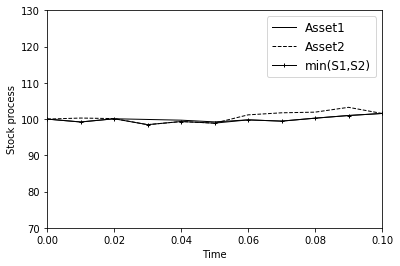

In [15]:
# visualization
plt.plot(t,S1[:],'k-',
        label='Asset1',linewidth=1,
        markersize=3.5)
plt.plot(t,S2[:],'k--',
        label='Asset2',linewidth=1,
        markersize=3.5)
plt.plot(t,Worst_performer[:],'k+-',
        label='min(S1,S2)',linewidth=1,
        markersize=3.5)
plt.legend()
plt.xlim(0,0.1)
plt.ylim(70,130)
plt.xlabel('Time')
plt.ylabel('Stock process')
plt.legend(prop={'size':12})
plt.show()